In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

1. Each column of tx represents the data values.
2. Each row represents one personn.
3. We have 1's in tx because of the coefficient w0 that represent an offset that cannot be directly linked to tx.
4. If we have heights and weights of 3 people then size of y=3 and size of tx=3x2. Then tx[3,2] is the height of the 3rd personn.


In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):
    e = y - tx.dot(w) # error
    
    """Using mse""" 
    loss = 1/2*np.mean(e**2) # loss with mse
    
    """Try with mae"""
    #loss = 1/2*np.mean(np.abs(e)) # loss with mae
    return loss

In [5]:
w=np.transpose([1,2])
compute_loss(y, tx, w)

2694.4833658870843

# Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(0,len(w0)):
        for j in range(0,len(w1)):
            w=[w0[i],w1[j]]
            losses[i][j]=compute_loss(y, tx, w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.117 seconds


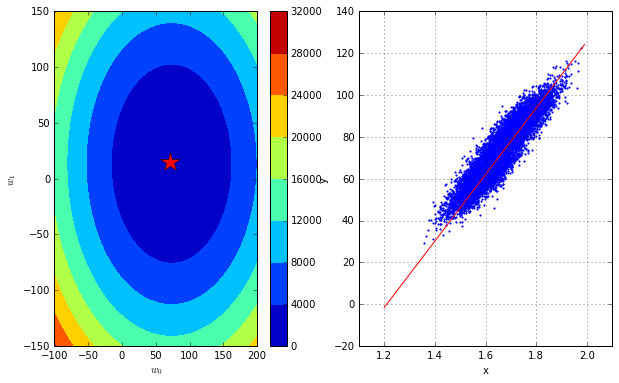

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot50")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N=y.shape[0]
    e=y-np.dot(tx,w)
    gradient=-1/N*np.dot(np.transpose(tx),e)
    return gradient

In [9]:
w0=[100,20]
grad0=compute_gradient(y, tx, w0)
loss0=compute_loss(y, tx, w0)
norm0=np.linalg.norm(grad0)

print("For w0{w0}\ngradient = {grad0}\nnorm = {norm0}\nloss = {loss0}\n\n".format(
        w0=w0, grad0=grad0, norm0=norm0, loss0=loss0))

w1=[50,10]
grad1=compute_gradient(y, tx, w1)
loss1=compute_loss(y, tx, w1)
norm1=np.linalg.norm(grad1)

print("For w1{w1}\ngradient = {grad1}\nnorm = {norm1}\nloss = {loss1}".format(
        w1=w1, grad1=grad1, norm1=norm1, loss1=loss1))

For w0[100, 20]
gradient = [ 26.706078     6.52028757]
norm = 27.490521129292503
loss = 393.25026384886803


For w1[50, 10]
gradient = [-23.293922    -3.47971243]
norm = 23.552392678247756
loss = 292.7434883040182


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad=compute_gradient(y, tx, w)
        loss=compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=w-gamma*grad
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759167, w0=29.317568800842082, w1=5.391884973995584
Gradient Descent(1/49): loss=1015.052184829351, w0=46.90811008134732, w1=8.62701595839293
Gradient Descent(2/49): loss=375.2657547746176, w0=57.462434849650464, w1=10.568094549031375
Gradient Descent(3/49): loss=144.94263995491318, w0=63.795029710632356, w1=11.732741703414439
Gradient Descent(4/49): loss=62.02631861981955, w0=67.59458662722149, w1=12.431529996044276
Gradient Descent(5/49): loss=32.176442939185876, w0=69.87432077717497, w1=12.850802971622183
Gradient Descent(6/49): loss=21.43048769415772, w0=71.24216126714705, w1=13.102366756968927
Gradient Descent(7/49): loss=17.561943805947607, w0=72.06286556113031, w1=13.253305028176975
Gradient Descent(8/49): loss=16.169268006191952, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279917, w0=72.85074168335423, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631588, w0=73.02801381085462, w1=

<function __main__.plot_figure>

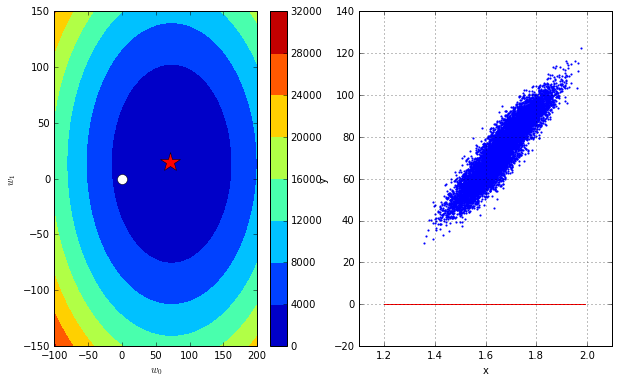

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [16]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    B = 32
    sum = 0
    for minibatch_y, minibatch_tx in batch_iter(y, tx, B):
        sum += compute_gradient(minibatch_y, minibatch_tx, w)

    return sum / B


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_epochs):
        # ***************************************************
        # compute gradient and loss
        # ***************************************************
        gradient = compute_stoch_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # update w by gradient
        # ***************************************************
        w=w-gamma*gradient
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_epochs - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [25]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

print(gradient_ws)

Gradient Descent(0/49): loss=2792.236712759167, w0=2.2724452059538507, w1=0.13997268477388608
Gradient Descent(1/49): loss=2626.385299323695, w0=4.452671670990387, w1=0.47566141544842966
Gradient Descent(2/49): loss=2469.497432903843, w0=6.601424862282808, w1=0.5852888255285982
Gradient Descent(3/49): loss=2322.4635553515423, w0=8.72373198119252, w1=0.9889302169807682
Gradient Descent(4/49): loss=2178.0504277460695, w0=10.807456125255252, w1=1.3766464759117631
Gradient Descent(5/49): loss=2040.907199563082, w0=12.747151927803984, w1=1.4877347313593698
Gradient Descent(6/49): loss=1920.2453357061524, w0=14.609491899930099, w1=1.813210525496547
Gradient Descent(7/49): loss=1805.3706894794618, w0=16.327027282288213, w1=1.7472851710255535
Gradient Descent(8/49): loss=1706.8243596302812, w0=18.09423588499251, w1=2.050664293837958
Gradient Descent(9/49): loss=1604.2001322890844, w0=19.757155007130496, w1=1.9912747579487176
Gradient Descent(10/49): loss=1514.4706981355546, w0=21.4524531431298

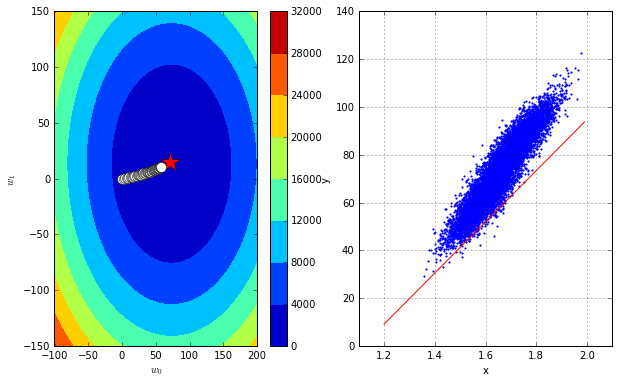

In [26]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))